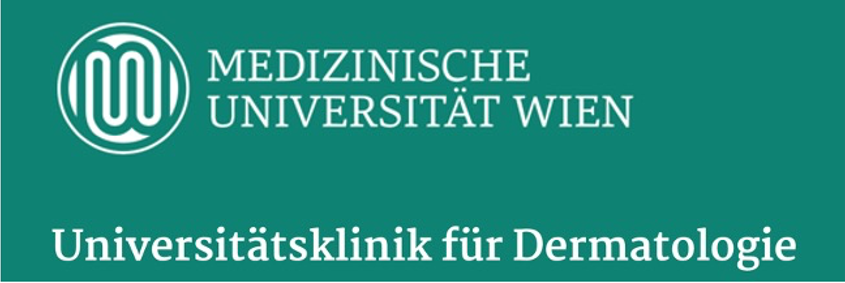

# <p style="text-align: center;"> Introduction to single cell analysis <br> (OEGDV 2025) </p>

### In this notebook we will analyse a subset of cell from the dataset associated to this [publication](https://www.science.org/doi/10.1126/science.aba6500?url_ver=Z39.88-2003&rfr_id=ori:rid:crossref.org&rfr_dat=cr_pub%20%200pubmed)  

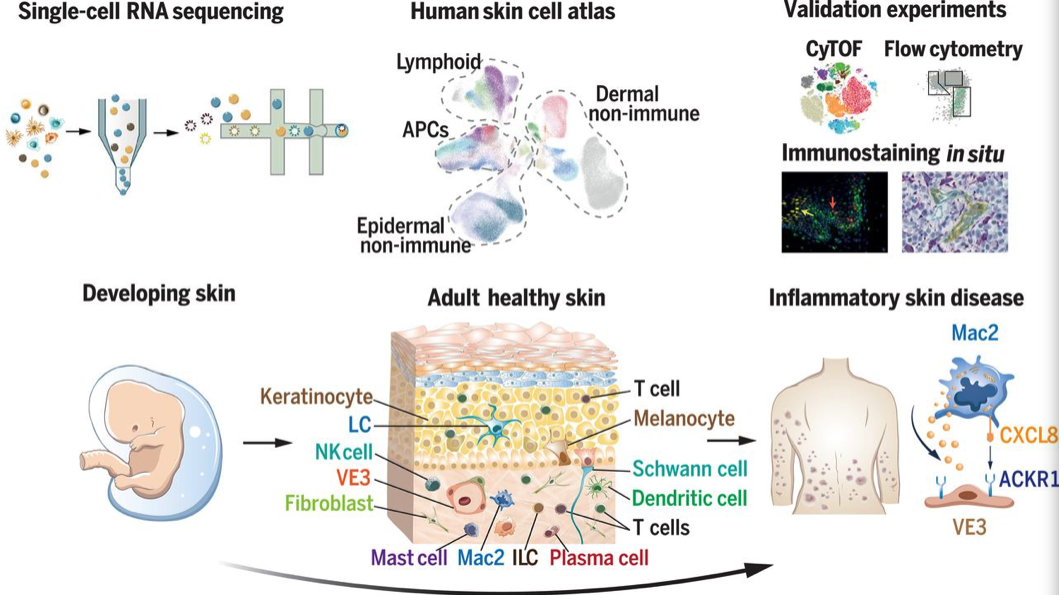

  
The dataset contains around 500k cells; I extracted 4 random samples from this dataset for this notebook  

In [2]:
rm(list=ls())  
my.libs=c("Seurat","Matrix","dplyr","ggplot2")
lapply(my.libs, require, character.only = TRUE)
sessionInfo()

Loading required package: Seurat

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, saveRDS


Loading Seurat v5 beta version 
To maintain compatibility with previous workflows, new Seurat objects will use the previous object structure by default
To use new Seurat v5 assays: Please run: options(Seurat.object.assay.version = 'v5')

Loading required package: Matrix

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggplot2



[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

R version 4.3.0 (2023-04-21)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 22.04.2 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/atlas/libblas.so.3.10.3 
LAPACK: /usr/lib/x86_64-linux-gnu/atlas/liblapack.so.3.10.3;  LAPACK version 3.10.0

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] ggplot2_3.4.2           dplyr_1.1.2             Matrix_1.5-4           
[4] Seurat_4.9.9.9044       SeuratObject_4.9.9.9084 sp_1.6-0               

loaded via a namespace (and not attached):
  [1] deldir_1.0-6           pbapply_1.7-0          g

In [3]:
samples=c("PMID_33479125_sample1.RData","PMID_33479125_sample2.RData","PMID_33479125_sample3.RData",
         "PMID_33479125_sample4.RData")  ## if you have samples in the tens you can read this from an excel sheet

In [4]:
samples=c("PMID_33479125_sample1.RData","PMID_33479125_sample2.RData","PMID_33479125_sample3.RData",
         "PMID_33479125_sample4.RData")  ## if you have samples in the tens you can read this from an excel sheet
for (k in 1:4){
    print(paste("this is sample",samples[k], "now!"))
    load(samples[k])
    dat2=CreateSeuratObject(mtx,assay = "RNA") 
    dat2@meta.data$batch = rep(k,nrow(dat2@meta.data))
 if (exists("m.dat")){
     m.dat=merge(m.dat,dat2) 
     }else {
         m.dat=dat2
     }
 }

[1] "this is sample PMID_33479125_sample1.RData now!"
[1] "this is sample PMID_33479125_sample2.RData now!"
[1] "this is sample PMID_33479125_sample3.RData now!"
[1] "this is sample PMID_33479125_sample4.RData now!"


In [5]:
head(m.dat@meta.data)
dim(m.dat)
class(m.dat)

,orig.ident,nCount_RNA,nFeature_RNA,batch
,<chr>,<dbl>,<int>,<int>
AAACCTGAGAGAGCTC-1-SKN8105194,SeuratProject,1866.405,2434,1
AAACCTGAGGCTCTTA-1-SKN8105194,SeuratProject,1674.033,1678,1
AAACCTGAGGTGCACA-1-SKN8105194,SeuratProject,1647.620,1908,1
AAACCTGAGTAGCGGT-1-SKN8105194,SeuratProject,1704.776,1960,1
AAACCTGCACACAGAG-1-SKN8105194,SeuratProject,2072.100,2613,1
AAACCTGGTATCTGCA-1-SKN8105194,SeuratProject,1759.951,2098,1


[1] 28678 25251

[1] "Seurat"
attr(,"package")
[1] "SeuratObject"

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 5.4 GiB”
Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 5.4 GiB”


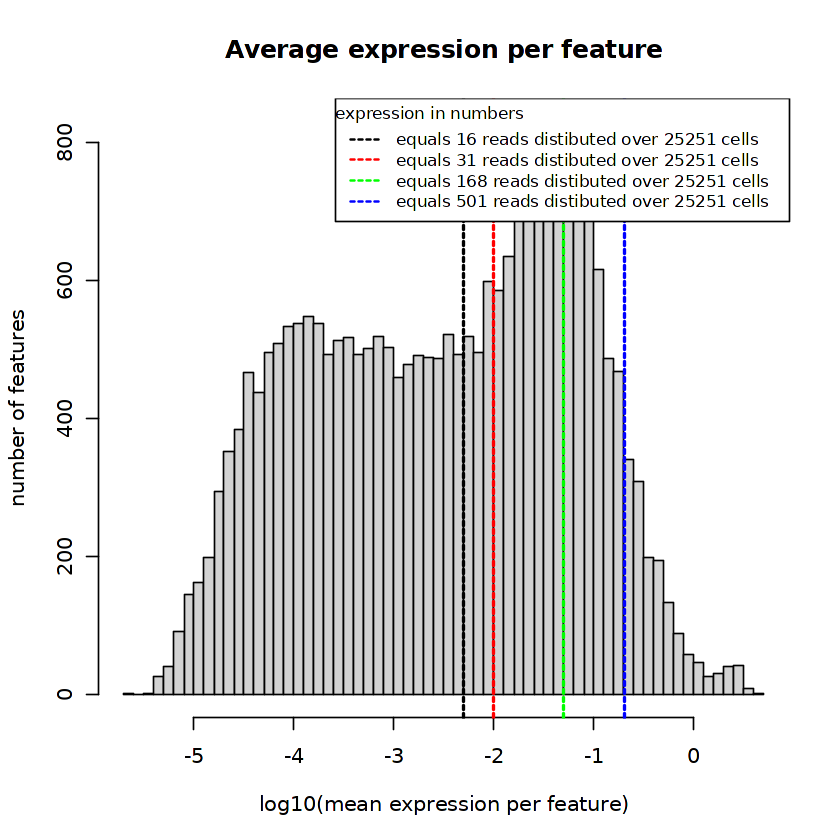

In [6]:
umi_per_feature=apply(m.dat@assays$RNA@counts,1,sum)
ave_per_feature=apply(m.dat@assays$RNA@counts,1,mean)
total=dim(m.dat@assays$RNA@counts)[2]
one=format(mean(umi_per_feature[log10(ave_per_feature)<log10(0.2)]),digits=1)
two=format(mean(umi_per_feature[log10(ave_per_feature)<log10(0.05)]),digits=1)
drei=format(mean(umi_per_feature[log10(ave_per_feature)<log10(0.01)]),digits=1)
four=format(mean(umi_per_feature[log10(ave_per_feature)<log10(0.005)]),digits=1)

hist(log10(ave_per_feature),breaks=50,main=c("Average expression per feature"),xlab=c("log10(mean expression per feature)"),
     ylab=c("number of features"))
abline(v=log10(0.2),col="blue",lty=2,lwd=2)
abline(v=log10(0.05),col="green",lty=2,lwd=2)
abline(v=log10(0.01),col="red",lty=2,lwd=2)
abline(v=log10(0.005),col="black",lty=2,lwd=2)

legend("topright", legend=c(paste("equals",four,"reads distibuted over",total,"cells"), 
                            paste("equals",drei,"reads distibuted over",total,"cells"),
                            paste("equals",two,"reads distibuted over",total,"cells"),
                            paste("equals",one,"reads distibuted over",total,"cells")),
       col=c("black", "red","green","blue"), lty=c(2),lwd=1.5, cex=0.8, title="expression in numbers",title.adj=0)


#### this threshold depends on many factors like how many cell types do we expect etc.  
#### I personally suspect that be more than 100 datapoints across around 25k samples (cells) are necessary to produce robust results

In [7]:
## restrict to minimum UMIs per gene
thresh1=c(100)
paste("applying a threshold of",thresh1, "UMI per gene will remove",table(umi_per_feature>thresh1)[1], "genes",sep=" ")
paste(" and leave",table(umi_per_feature>thresh1)[2],"in our analysis",sep=" ")
m.dat2=m.dat[umi_per_feature>thresh1,] 
dim(m.dat)
dim(m.dat2)

[1] "applying a threshold of 100 UMI per gene will remove 16111 genes"

[1] " and leave 12567 in our analysis"

[1] 28678 25251

[1] 12567 25251

### this assumes that a UMI threshold and a mitochondrial RNA thresholds have been applied in the initial QC process of the individual samples

In [8]:
options(warn = -1)  ## turn off warnings -- that can slow down the process significantly
m.dat2=SCTransform(m.dat2, variable.features.n = NULL)
s.genes = cc.genes$s.genes   ## these lists are loaded with Seurat
g2m.genes = cc.genes$g2m.genes
m.dat2 =CellCycleScoring(m.dat2, s.features = s.genes, g2m.features = g2m.genes, set.ident = TRUE)
m.dat2$CC.Difference = m.dat2$S.Score - m.dat2$G2M.Score

Running SCTransform on assay: RNA

vst.flavor='v2' set, setting model to use fixed slope and exclude poisson genes.

Calculating cell attributes from input UMI matrix: log_umi

Total Step 1 genes: 12567

Total overdispersed genes: 803

Excluding 11764 genes from Step 1 because they are not overdispersed.

Variance stabilizing transformation of count matrix of size 12567 by 25251

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 803 genes, 5000 cells



  |======================================================================| 100%


Setting estimate of  0 genes to inf as theta_mm/theta_mle < 1e-3

# of step1 poisson genes (variance < mean): 0

# of low mean genes (mean < 0.001): 0

Total # of Step1 poisson genes (theta=Inf; variance < mean): 0

Total # of poisson genes (theta=Inf; variance < mean): 11764

Calling offset model for all 11764 poisson genes

Ignoring theta inf genes

Replacing fit params for 11764 poisson genes by theta=Inf

Setting min_variance based on median UMI:  0.0169409951086097

Second step: Get residuals using fitted parameters for 12567 genes



  |======================================================================| 100%


Computing corrected count matrix for 12567 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 47.4937 secs

Determine variable features

Centering data matrix

Place corrected count matrix in counts slot

Set default assay to SCT



In [9]:
## for this example analysis of published data I did not QC each samples seperately
m.dat2[["percent.mt"]] = PercentageFeatureSet(m.dat2, pattern = "^MT-")
m.dat2=SCTransform(m.dat2, variable.features.n = NULL,vars.to.regress=c("percent.mt","CC.Difference")) %>% RunPCA(verbose = TRUE)

Running SCTransform on assay: SCT

vst.flavor='v2' set, setting model to use fixed slope and exclude poisson genes.

Calculating cell attributes from input UMI matrix: log_umi

Total Step 1 genes: 12093

Total overdispersed genes: 8704

Excluding 3389 genes from Step 1 because they are not overdispersed.

Variance stabilizing transformation of count matrix of size 12554 by 25251

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells



  |======================================================================| 100%


Setting estimate of  468 genes to inf as theta_mm/theta_mle < 1e-3

# of step1 poisson genes (variance < mean): 0

# of low mean genes (mean < 0.001): 470

Total # of Step1 poisson genes (theta=Inf; variance < mean): 469

Total # of poisson genes (theta=Inf; variance < mean): 3846

Calling offset model for all 3846 poisson genes

Found 589 outliers - those will be ignored in fitting/regularization step


Ignoring theta inf genes

Replacing fit params for 3846 poisson genes by theta=Inf

Setting min_variance based on median UMI:  0.04

Second step: Get residuals using fitted parameters for 12554 genes



  |======================================================================| 100%


Computing corrected count matrix for 12554 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 50.55477 secs

Determine variable features

Regressing out percent.mt, CC.Difference

Centering data matrix

Place corrected count matrix in counts slot

Set default assay to SCT

PC_ 1 
Positive:  KRT14, KRT5, S100A2, SFN, CXCL14, CCL27, CAV1, LGALS7B, MT1X, DST 
	   IGFBP3, TACSTD2, KRT15, FGFBP1, DMKN, S100A14, MT1E, LY6D, CLDN1, POSTN 
	   MT2A, KRT17, SERPINB2, KRT1, KRT16, CYR61, ADM, SLC2A1, EGR1, KRTDAP 
Negative:  HLA-DRA, CXCL8, CCL22, CD74, C15orf48, IDO1, CCR7, HLA-DQA1, HLA-DRB1, IL1B 
	   HLA-DPA1, HLA-DPB1, CD83, TYROBP, THBS1, MMP9, EREG, CXCL2, CTSL, G0S2 
	   HLA-DRB5, LYZ, CXCL5, CXCL1, IL4I1, INHBA, TIMP1, HMOX1, CST3, BCL2A1 
PC_ 2 
Positive:  CCL22, HLA-DQB2, IDO1, HLA-DPB1, CD74, HLA-DPA1, ACOT7, HLA-DQA1, HLA-DRA, HLA-DRB1 
	   HLA-DQB1, CCR7, HLA-DRB5, DNASE1L3, C11orf86, CST7, GPR183, AOC1, MARCKSL1, CD83 
	   RAMP1, CD207, FSCN1, LAMP3, RAB7B, FCGBP, IL4I1, ATF5, PLA2G16, RGS1 
Negative:  IL1B

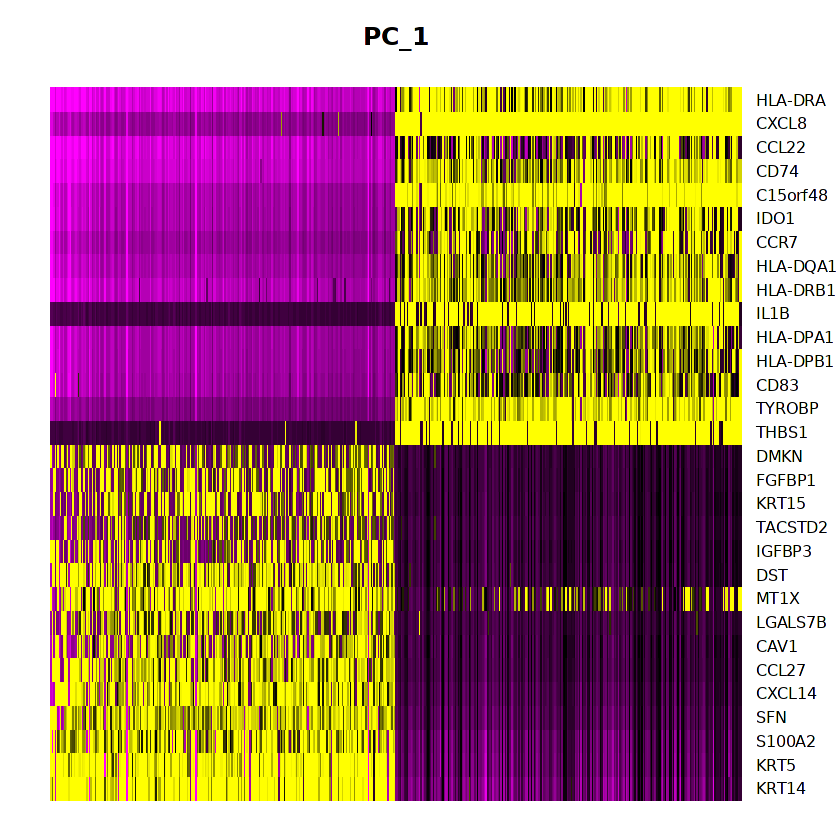

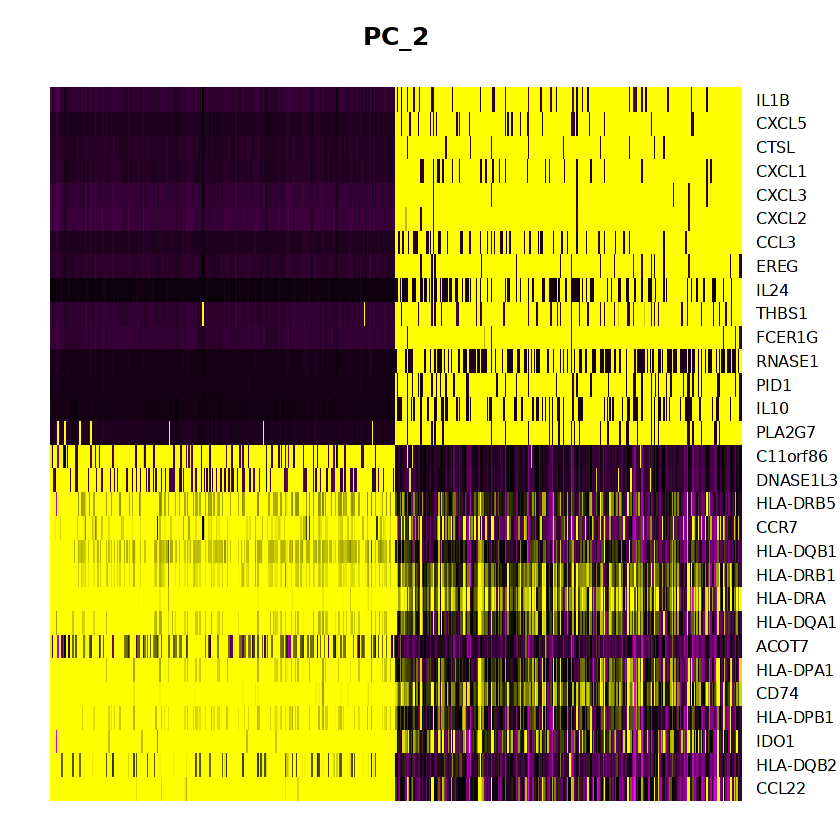

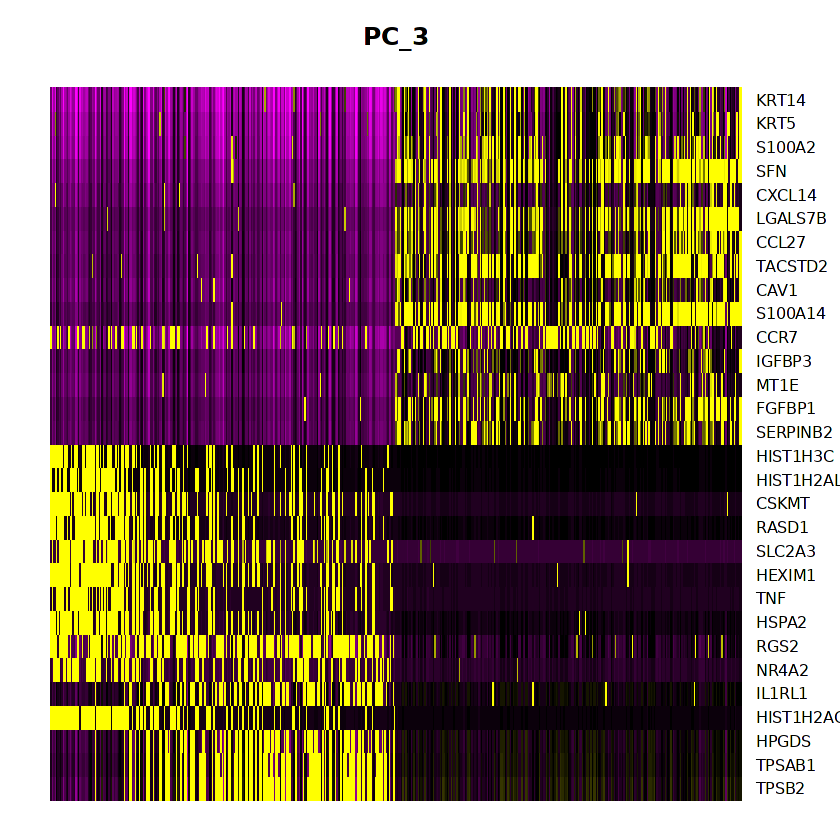

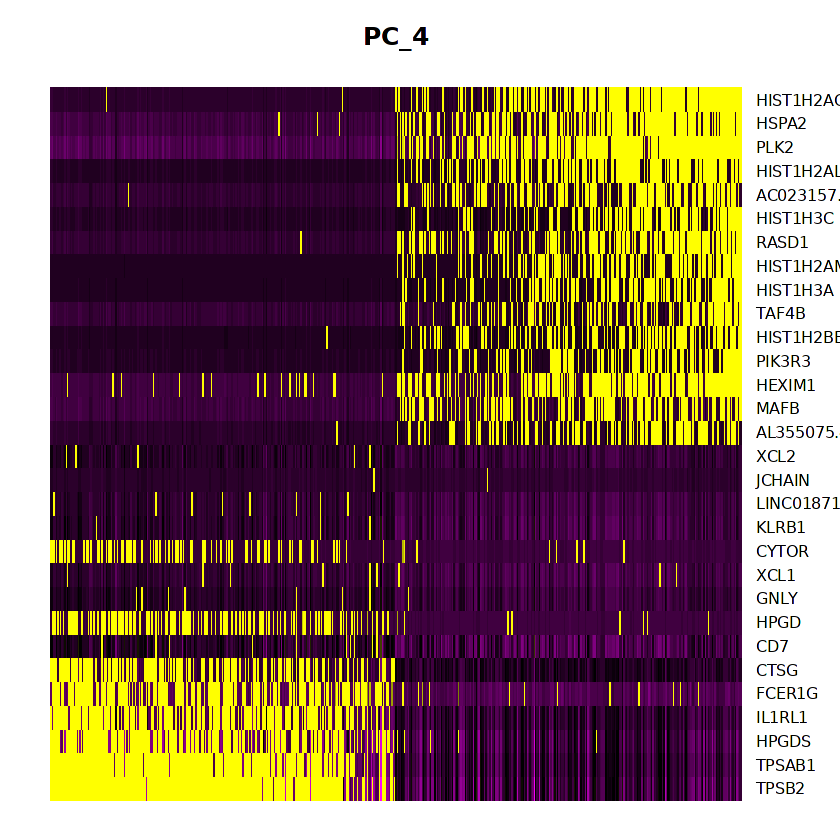

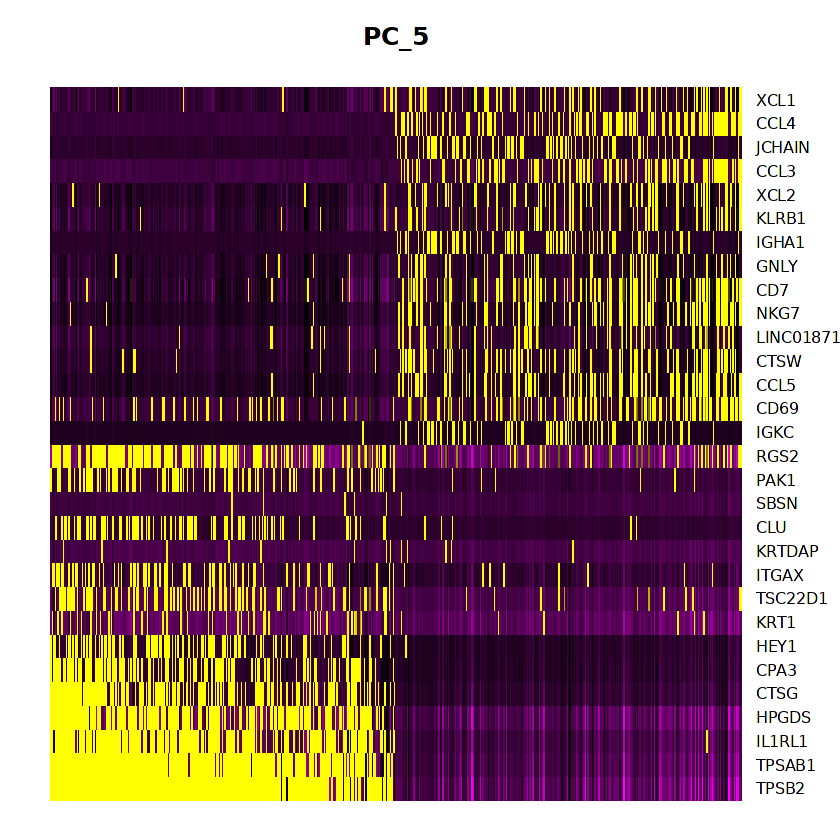

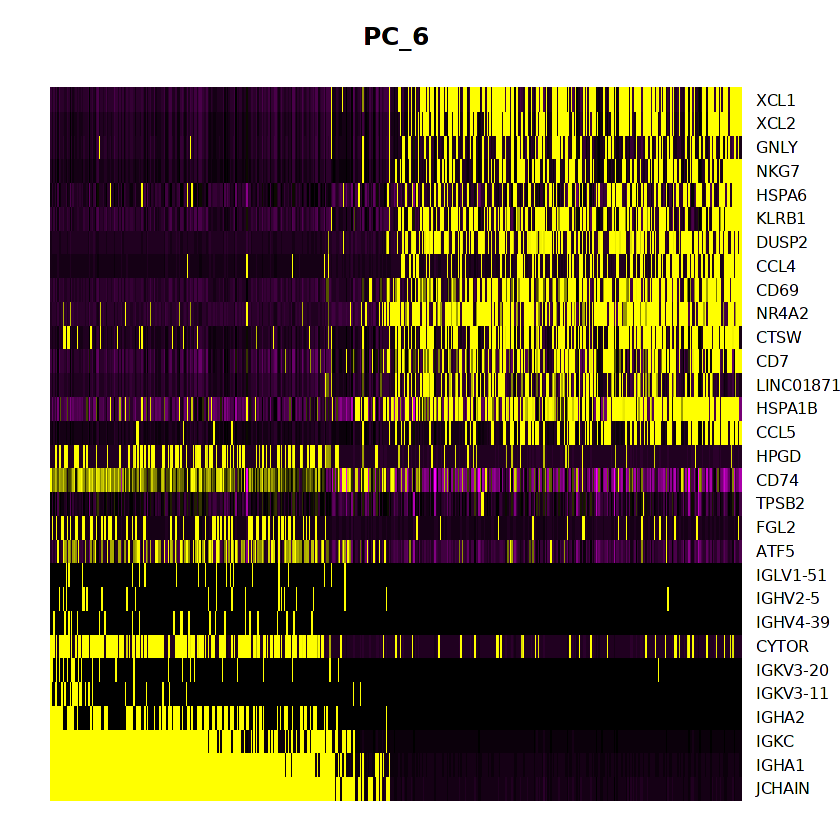

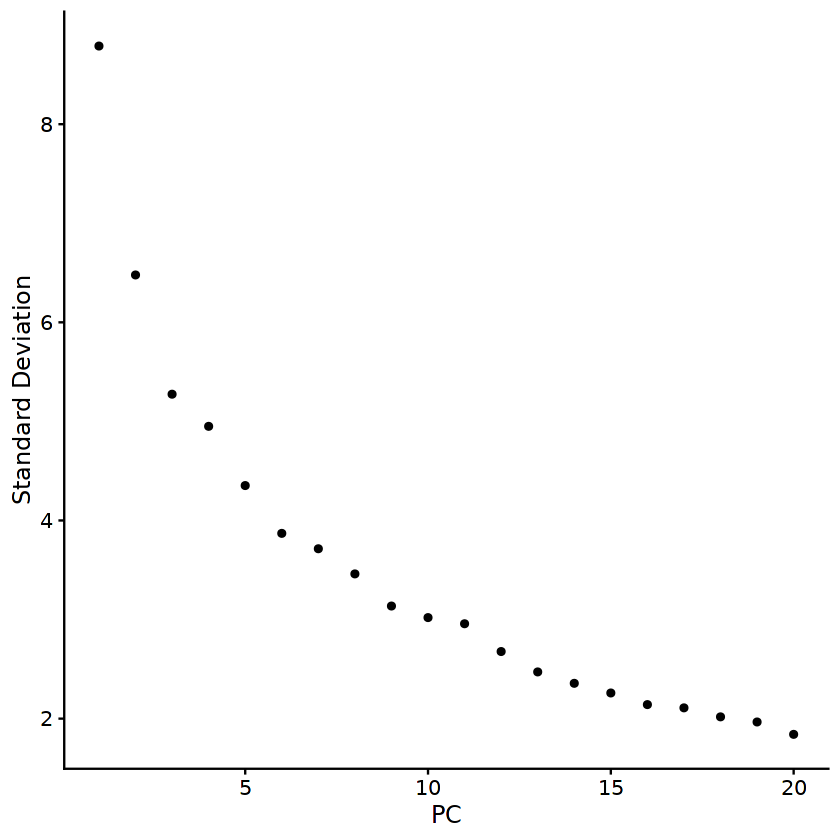

In [10]:
Seurat::DimHeatmap(m.dat2, reduction = "pca",dims = 1, cells = 500, balanced = TRUE)  ### plot the top 500 cells (highest scores)
Seurat::DimHeatmap(m.dat2, dims = 2,reduction = "pca", cells = 500, balanced = TRUE)  ### plot the top 500 cells (highest scores)
Seurat::DimHeatmap(m.dat2, dims = 3,reduction = "pca", cells = 500, balanced = TRUE)
Seurat::DimHeatmap(m.dat2, dims = 4, reduction = "pca",cells = 500, balanced = TRUE)
Seurat::DimHeatmap(m.dat2, dims = 5,reduction = "pca", cells = 500, balanced = TRUE)
Seurat::DimHeatmap(m.dat2, dims = 6,reduction = "pca", cells = 500, balanced = TRUE)
Seurat::ElbowPlot(m.dat2,reduction="pca")

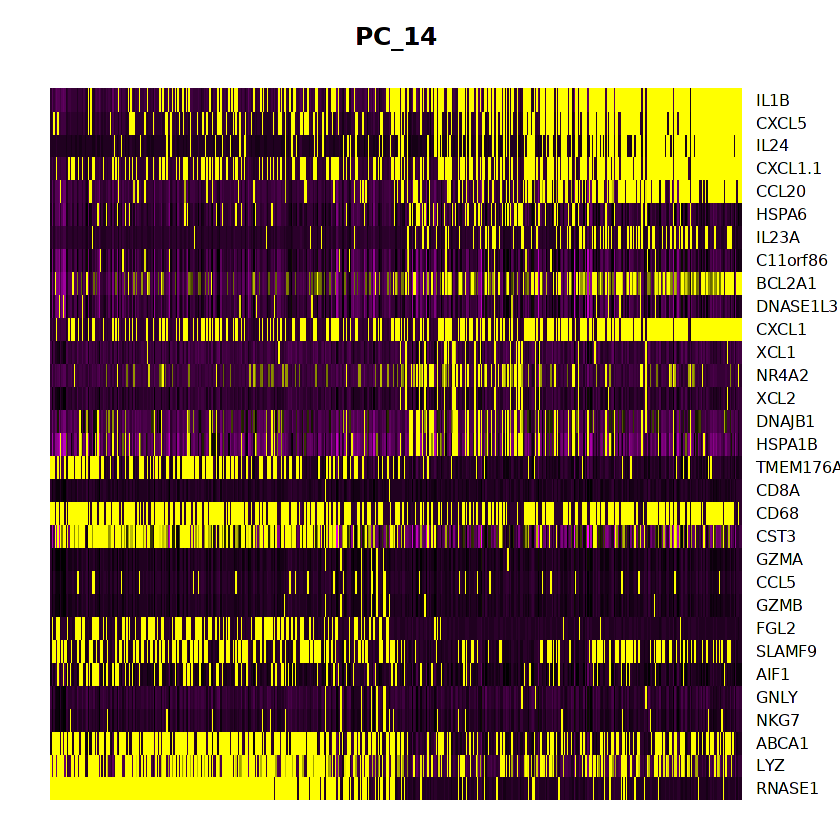

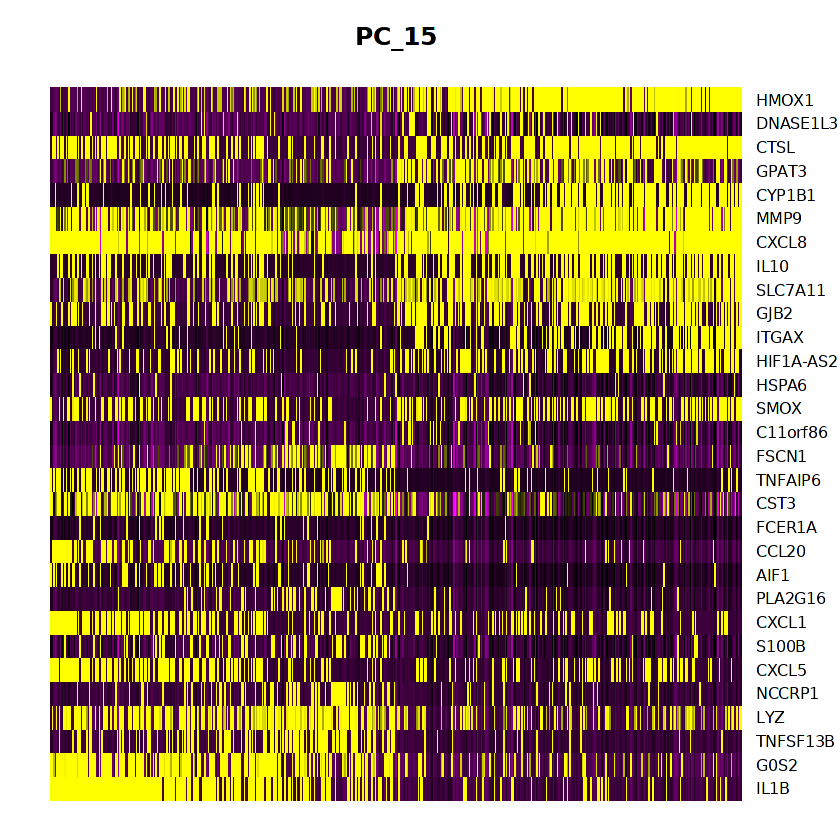

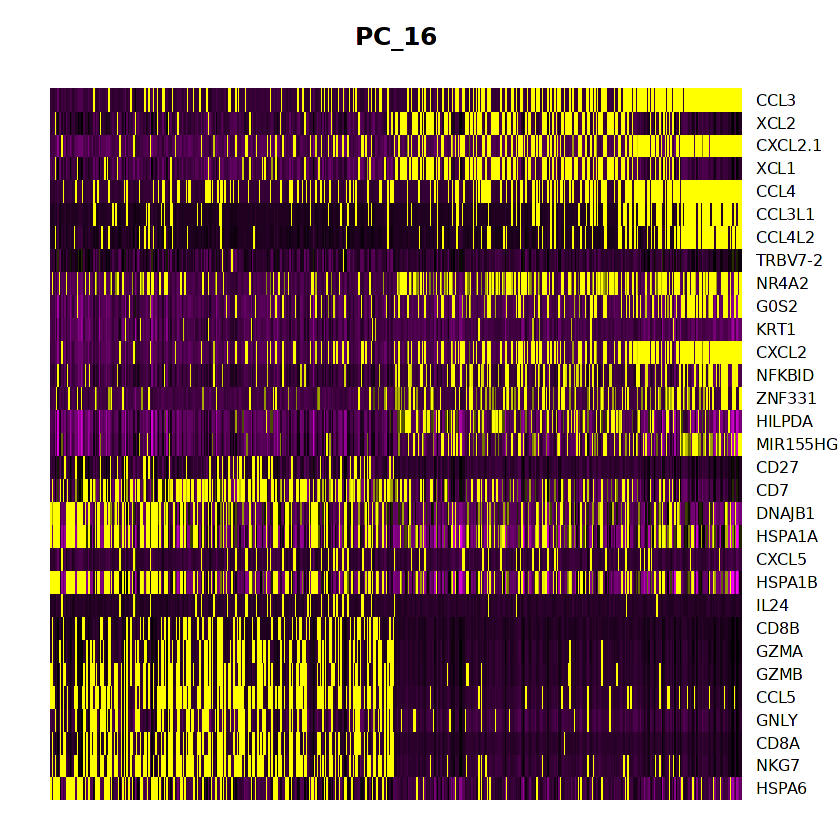

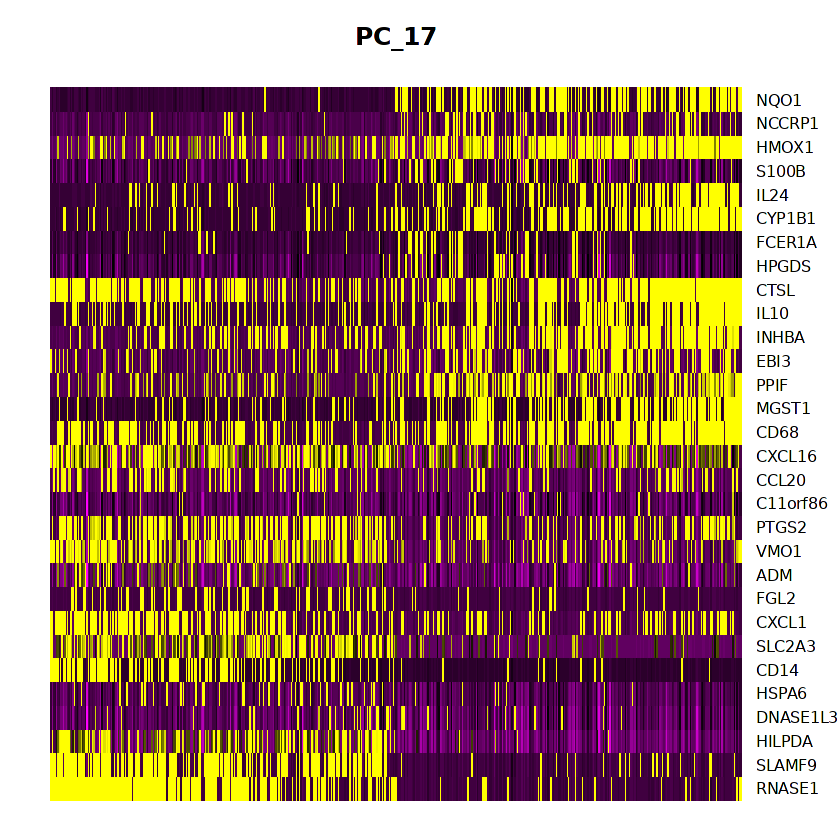

In [11]:
Seurat::DimHeatmap(m.dat2, dims = 14,reduction = "pca", cells = 500, balanced = TRUE)
Seurat::DimHeatmap(m.dat2, dims = 15,reduction = "pca", cells = 500, balanced = TRUE)
Seurat::DimHeatmap(m.dat2, dims = 16,reduction = "pca", cells = 500, balanced = TRUE)
Seurat::DimHeatmap(m.dat2, dims = 17,reduction = "pca", cells = 500, balanced = TRUE)

In [12]:
sig_PCs=c(1:17)
m.dat2 = RunTSNE(m.dat2, reduction.use = "pca",dims = sig_PCs)
m.dat2=Seurat::FindNeighbors(m.dat2,reduction = "pca",k.param = 20,dims=sig_PCs)

Computing nearest neighbor graph

Computing SNN



In [13]:
clust_test=function(sce) {
  cont=as.data.frame(matrix(NA,nrow=length(unique(Idents(sce))), ncol=4))
  colnames(cont)=c("cluster","cells","mean_total_UMI","mean_features")
  i=1
  for (k in unique(Idents(sce))) {
    print(c(k))
    cont[i,1]=c(k)
    dat23=sce@assays$RNA@counts[,Idents(sce)%in%c(k)]
    cont[i,2]=table(Idents(sce)%in%c(k))[2]
    cont[i,3]=mean(apply(dat23,2,function(x)sum(x)))
    cont[i,4]=mean(apply(dat23,2,function(x)table(x %in% c(0))[1]))
    i=i+1
  }
  cont=cont[order(as.numeric(as.character(cont$cluster))),]
  return(cont)
}

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 25251
Number of edges: 847571

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9406
Number of communities: 14
Elapsed time: 6 seconds
[1] "0"
[1] "12"
[1] "5"
[1] "9"
[1] "7"
[1] "6"
[1] "4"
[1] "13"
[1] "2"
[1] "8"
[1] "10"
[1] "1"
[1] "3"
[1] "11"


,cluster,cells,mean_total_UMI,mean_features
,<chr>,<int>,<dbl>,<dbl>
1,0,4897,1526.7185,1450.0890
12,1,4541,1358.3400,1424.1881
9,2,2777,1555.8226,2786.8513
13,3,2639,1360.7263,2002.2717
7,4,2166,1474.8987,1808.9063
3,5,2103,1471.3751,1301.6700
6,6,1498,1487.5030,2025.1402
5,7,1467,1153.5008,837.7280
10,8,1155,1346.1106,1483.5472


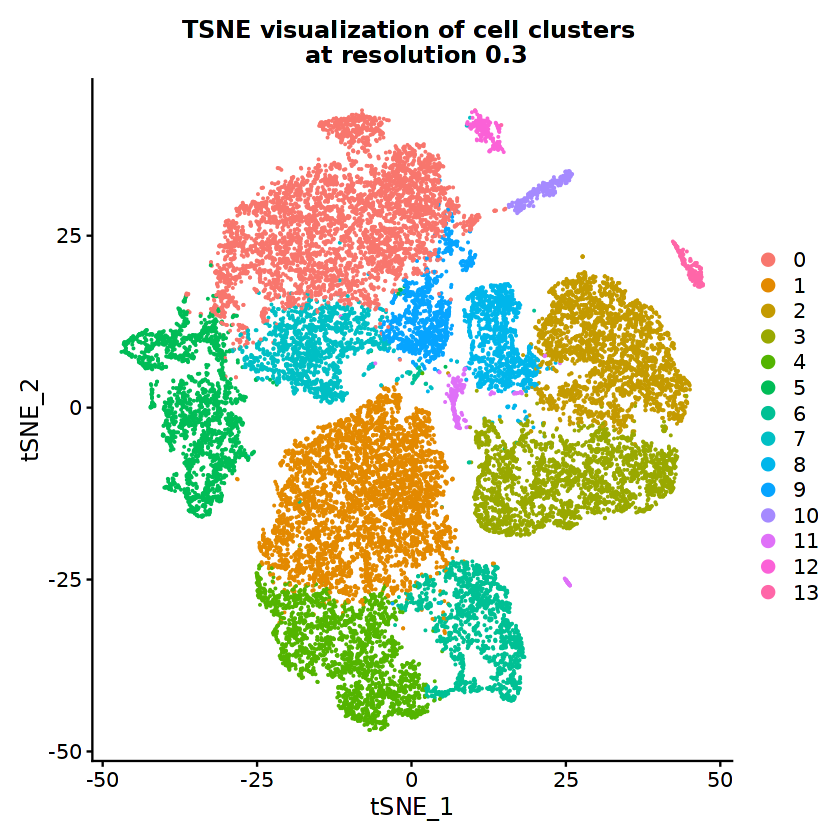

In [14]:
clust.res=0.3     ## change and rerun
m.dat2=Seurat::FindClusters(m.dat2,resolution=clust.res)  
pl=Seurat::DimPlot(m.dat2, reduction = "tsne")
pl= pl+ ggtitle(paste("TSNE visualization of cell clusters \n at resolution",clust.res,sep=" ")) +
  theme (plot.title = element_text(color="black", size=14, face="bold",hjust = 0.5))
pl
res1=clust_test(m.dat2)
res1

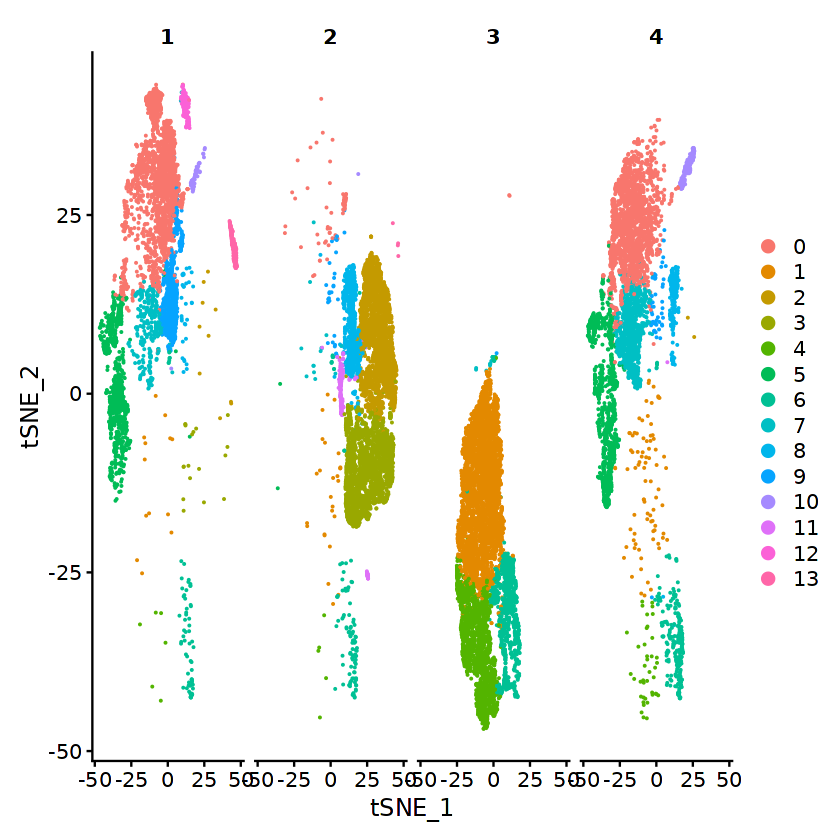

In [15]:
Seurat::DimPlot(m.dat2, reduction = "tsne",split.by="batch")

__that does not look too confindence inspiring to me__  
__however according to celltype assignment in the paper this OK__    
__if I would see that in my data I would at least run Harmony batch removal software__.  

In [16]:
## i thought to leave the usual data wrangling in the code for you
phe=read.table("phenotype_file_from_PMID_33479125.txt",header=T)  #import
head(phe)  ## check out
dim(phe)
dim(m.dat2@meta.data)
table(colnames(m.dat2) %in% rownames(phe)) ## check overlap
phe1=phe[,c("Status","Site","Tissue","Enrichment","Location",
            "donor_id","Sex","Age","stage","final_clustering")] ## extract what is needed (to avoid duplication with our own QC procedure)
phe1$ID=as.character(rownames(phe1))  ## get ID for merge
#head(phe1)

,orig.ident,nCount_originalexp,nFeature_originalexp,Status,Site,Tissue,Enrichment,Location,donor_id,Sex,Age,stage,final_clustering,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,n_counts,ID2
,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<int>,<chr>
AAACCTGAGAGAGCTC-1-SKN8105194,SeuratProject,1866.405,2434,Healthy,non_lesion,Epidermis,Lymphocytes,Breast,S5,Female,NA,adult,Th,2434,2434,7878,60,0.7616146,7878,SKN8105194
AAACCTGAGGCTCTTA-1-SKN8105194,SeuratProject,1674.033,1678,Healthy,non_lesion,Epidermis,Lymphocytes,Breast,S5,Female,NA,adult,Th,1678,1678,4710,150,3.1847134,4710,SKN8105194
AAACCTGAGGTGCACA-1-SKN8105194,SeuratProject,1647.620,1908,Healthy,non_lesion,Epidermis,Lymphocytes,Breast,S5,Female,NA,adult,Th,1908,1908,6283,437,6.9552765,6283,SKN8105194
AAACCTGAGTAGCGGT-1-SKN8105194,SeuratProject,1704.776,1960,Healthy,non_lesion,Epidermis,Lymphocytes,Breast,S5,Female,NA,adult,Treg,1960,1960,6603,251,3.8013027,6603,SKN8105194
AAACCTGCACACAGAG-1-SKN8105194,SeuratProject,2072.100,2613,Healthy,non_lesion,Epidermis,Lymphocytes,Breast,S5,Female,NA,adult,Th,2613,2613,7079,158,2.2319536,7079,SKN8105194
AAACCTGGTATCTGCA-1-SKN8105194,SeuratProject,1759.951,2098,Healthy,non_lesion,Epidermis,Lymphocytes,Breast,S5,Female,NA,adult,Th,2098,2098,6304,181,2.8711927,6304,SKN8105194


[1] 23954    20

[1] 25251    14


FALSE  TRUE 
 1297 23954 

In [17]:
## data wrangling - merge
sce.meta=as.data.frame(m.dat2@meta.data)  ## prep meta data from Seurat object
sce.meta$ID=as.character(rownames(sce.meta))
#head(sce.meta)
inter=merge(sce.meta,phe1,by.x="ID",by.y="ID")
rownames(inter)=as.character(inter$ID)  ### set rownames again
inter=inter[as.character(colnames(m.dat2)),]  ## order merged dataframe according to sce seurat object
head(inter)
######. ==============. finally put the new meta.data dataframe into Seurat object
m.dat2@meta.data=inter

,ID,orig.ident,nCount_RNA,nFeature_RNA,batch,nCount_SCT,nFeature_SCT,S.Score,G2M.Score,Phase,⋯,Status,Site,Tissue,Enrichment,Location,donor_id,Sex,Age,stage,final_clustering
,<chr>,<chr>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>
AAACCTGAGAGAGCTC-1-SKN8105194,AAACCTGAGAGAGCTC-1-SKN8105194,SeuratProject,1862.140,2425,1,1092,914,0.024815920,0.0205350557,S,⋯,Healthy,non_lesion,Epidermis,Lymphocytes,Breast,S5,Female,NA,adult,Th
AAACCTGAGGCTCTTA-1-SKN8105194,AAACCTGAGGCTCTTA-1-SKN8105194,SeuratProject,1667.732,1669,1,1692,1615,0.032950765,-0.0186807117,S,⋯,Healthy,non_lesion,Epidermis,Lymphocytes,Breast,S5,Female,NA,adult,Th
AAACCTGAGGTGCACA-1-SKN8105194,AAACCTGAGGTGCACA-1-SKN8105194,SeuratProject,1639.705,1894,1,1766,1696,0.040732150,-0.0025545256,S,⋯,Healthy,non_lesion,Epidermis,Lymphocytes,Breast,S5,Female,NA,adult,Th
AAACCTGAGTAGCGGT-1-SKN8105194,AAACCTGAGTAGCGGT-1-SKN8105194,SeuratProject,1700.422,1952,1,1079,754,0.009442641,0.0079592047,S,⋯,Healthy,non_lesion,Epidermis,Lymphocytes,Breast,S5,Female,NA,adult,Treg
AAACCTGCACACAGAG-1-SKN8105194,AAACCTGCACACAGAG-1-SKN8105194,SeuratProject,2062.819,2595,1,1073,969,-0.006639519,0.0002837198,G2M,⋯,Healthy,non_lesion,Epidermis,Lymphocytes,Breast,S5,Female,NA,adult,Th
AAACCTGGTATCTGCA-1-SKN8105194,AAACCTGGTATCTGCA-1-SKN8105194,SeuratProject,1748.878,2079,1,1486,1314,0.026595191,0.0276013887,G2M,⋯,Healthy,non_lesion,Epidermis,Lymphocytes,Breast,S5,Female,NA,adult,Th


### now we can overlay the predicted celltypes from the paper to our dataset. 

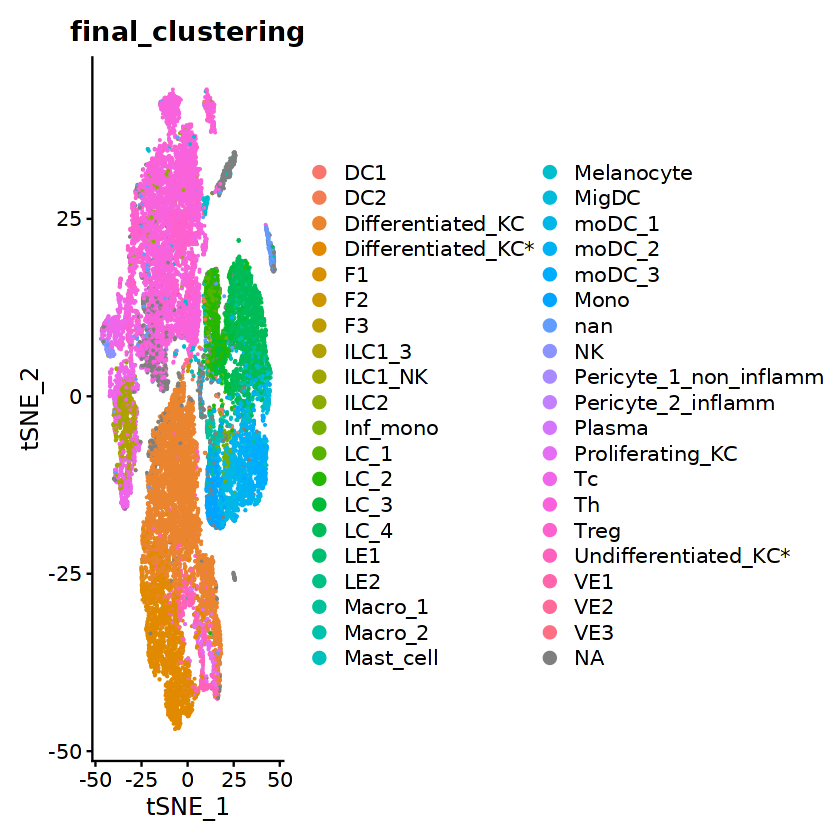

In [18]:
Seurat::DimPlot(m.dat2, reduction = "tsne",group.by="final_clustering")

In [19]:
table(m.dat2@meta.data$batch, m.dat2@meta.data$final_clustering)

   
     DC1  DC2 Differentiated_KC Differentiated_KC*   F1   F2   F3 ILC1_3
  1    1    4                48                  5    2    1    2    107
  2   17   36                79                  5    2    1    0      0
  3    0    0              4701               2180    0    0    0      0
  4    0    2               212                 38    0    6    0    244
   
    ILC1_NK ILC2 Inf_mono LC_1 LC_2 LC_3 LC_4  LE1  LE2 Macro_1 Macro_2
  1     327   18        2    8   10    1    2    1    1       3       3
  2       1    1       88  104  538  492 1913    0    3     327     138
  3       0    0        0    0    0    0    0    2    1       0       0
  4      38   77        0   61  124    1    1    0    0       0      11
   
    Mast_cell Melanocyte MigDC moDC_1 moDC_2 moDC_3 Mono  nan   NK
  1        16         36     4      3      0      3    8  148   69
  2         0         48   278    603    604    537  507   76    0
  3         0          1     0      0      0      0    0   15 

### the code snippet below will do the follwoing:  
>* run through each cluster and compare every cluster against every cluster seperately 
>* we will use the default Wilcox test - this not ideal   
>* a negative Binomial regression model should be applied (DESeq2)  
>* look into "MAST" Regression as well - this also handles zero inflated data well. 
>  
>* a database file (tab-delimited text file) will be created  
>* data base only contains:  
>>* FDR significant associations (Benjamini Hochberg corrected P-values). 
>>* it will only output assoc. with a log2 Foldchange of 0.15  
>>* at least 30 cells per group for each comparison  
>>* it only outputs positive FC (that should increase the specificity of each cluster)  
>* the code snippet will count actual cells with UMI per group  
>* count the total number of UMIs per group
>* calculates Area under curve 
>* this will create quite a large file with each genes present several times (depending how often it differentiates between 2 clusters.  



In [ ]:
# ====================================.  prep input data
sce.seurat=m.dat2  ## in the code snippet the Seurat object is called sce.seurat
clust.n=as.character(unique(Idents(sce.seurat)))
clust.size=table(Idents(sce.seurat))
clust.size
max_per_cluster=c(5000)  
clust.n=as.character(unique(Idents(sce.seurat)))
rm(res_wilcox)
library(pROC)
### ---------------------------------------------   one vs one for all cluster
for (i in clust.n) {        ##  case loop
     contr.clust=clust.n[!clust.n %in% i]
    for (k in contr.clust) {    ## contr loop
        if (i == k) {
            next
        }  
         print(paste("computing markers for cluster", i,"compared to",k,"now!!!", sep=" "))
          seurat_cluster_0 = FindMarkers(sce.seurat, ident.1 = i, ident.2 = k,test.use = "wilcox",
                                 logfc.threshold = 0.15,max.cells.per.ident = max_per_cluster,
                                min.cells.group=30,only.pos = TRUE)  # min.pct = 0.3
          seurat_cluster_0=seurat_cluster_0[seurat_cluster_0$p_val_adj < 0.05,]
        seurat_cluster_0$ID=as.character(rownames(seurat_cluster_0))
          seurat_cluster_0$case_CLUSTER=rep(i,nrow(seurat_cluster_0))
          seurat_cluster_0$contr_CLUSTER=rep(k,nrow(seurat_cluster_0))
          seurat_cluster_0$clust_size=rep(as.numeric(clust.size[i]),nrow(seurat_cluster_0))
          sce.case=sce.seurat[rownames(sce.seurat) %in%  as.character(seurat_cluster_0$ID),Idents(sce.seurat)%in%c(i)]
          sce.contr=sce.seurat[rownames(sce.seurat) %in%  as.character(seurat_cluster_0$ID),Idents(sce.seurat)%in%c(k)]
            seurat_cluster_0=seurat_cluster_0[as.character(rownames(sce.case)), ]
            seurat_cluster_0$case_total_umi=Matrix::rowSums(sce.case@assays$RNA@counts)
            seurat_cluster_0$contr_total_umi=Matrix::rowSums(sce.contr@assays$RNA@counts)
            ##.   ------------- get AUC
            auc.sce=merge(sce.case,sce.contr)
            seurat_cluster_0=seurat_cluster_0[as.character(rownames(auc.sce)), ]
            response=rep(1,length(Idents(auc.sce)))                                       
            response[Idents(auc.sce)%in% c(i)]=2
            seurat_cluster_0$AUC=apply(auc.sce@assays$SCT@data,1,function(x)auc(response,as.numeric(x),quiet=T,allow.invalid.partial.auc.correct=F))             
        if(!exists("res_wilcox")){
            res_wilcox=seurat_cluster_0
          }else {
            res_wilcox=rbind(res_wilcox,seurat_cluster_0)
          }
      rm(seurat_cluster_0,response,sce.contr,sce.case,auc.sce)
    } ## contr loop
}  ## case loop               


   0    1    2    3    4    5    6    7    8    9   10   11   12   13 
4897 4541 2777 2639 2166 2103 1498 1467 1155 1015  305  267  219  202 

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


